# Decision Tree Modeling

In [1]:
#======================================================================================================
# CODE NAME     : Decision Tree Modeling.py
# PURPOSE       : Demonstrate application of Decision Tree Modeling using scikitlearn and so on 
# APPLICATION   : Marketing Campaign
#=======================================================================================================

In [1]:
# Get the Training and Validation data for Marketing Campaign
import numpy as np
import pandas as pd

train = pd.read_excel("C:\\Users\\Training\\Data Science using SAS and Python\\Data\\train.xlsx")
valid = pd.read_excel("C:\\Users\\Training\\Data Science using SAS and Python\\Data\\valid.xlsx")
train.head()

,Selected,Ins,AcctAge,DDA,DDABal,CashBk,Checks,DirDep,NSF,NSFAmt,...,MILORes,MIHMVal,MIAge,MICRScor,SelectionProb,SamplingWeight,brclus1,brclus2,brclus3,B_DDABal
0,1,0,0.7,1,1986.81,0,1,1,0,0.00,...,0,0,0,0,0.666746,1.499822,0,0,0,58
1,1,0,0.5,1,1594.84,0,1,0,0,0.00,...,0,0,0,0,0.666746,1.499822,0,1,0,53
2,1,0,8.8,1,1437.57,0,12,1,0,0.00,...,0,0,0,0,0.666746,1.499822,0,1,0,51
3,1,0,0.8,1,190.03,0,1,0,1,5.65,...,0,0,0,0,0.666746,1.499822,1,0,0,15
4,1,0,3.0,1,1772.13,0,1,1,0,0.00,...,0,0,0,0,0.666746,1.499822,0,1,0,55


# Fit Decision Tree Modeling using Entrophy

In [3]:
from sklearn.tree import DecisionTreeClassifier

In [4]:
# Training the Model using Etrophy
X = train[['MIPhone','Teller','MM','LOC','CD','ATMAmt','brclus2','Inv','Dep','IRA','MTGBal',
            'AcctAge','SavBal','B_DDABal','Sav','Phone','CCBal','DirDep','ATM']]
Y = train.Ins
dt = DecisionTreeClassifier(criterion = "entropy")
entrophy_fit = dt.fit(X,Y)
entrophy_fit

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [6]:
# Print the Rules from Decision Tree Model
from sklearn.tree import export_text
entrophy_splits = export_text(entrophy_fit, feature_names=list(X.columns))
print(entrophy_splits)

|--- SavBal <= 1597.95
|   |--- B_DDABal <= 58.50
|   |   |--- MM <= 0.50
|   |   |   |--- SavBal <= 260.32
|   |   |   |   |--- B_DDABal <= 30.50
|   |   |   |   |   |--- CD <= 0.50
|   |   |   |   |   |   |--- Teller <= 2.50
|   |   |   |   |   |   |   |--- B_DDABal <= 5.50
|   |   |   |   |   |   |   |   |--- IRA <= 0.50
|   |   |   |   |   |   |   |   |   |--- CCBal <= 1737.12
|   |   |   |   |   |   |   |   |   |   |--- CCBal <= 1375.23
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 19
|   |   |   |   |   |   |   |   |   |   |--- CCBal >  1375.23
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |--- CCBal >  1737.12
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- IRA >  0.50
|   |   |   |   |   |   |   |   |   |--- DirDep <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- B_DDABal <= 1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated

In [7]:
# Export the Tree
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
print(graph)
import os     
os.environ["PATH"] += os.pathsep + 'C:\\Users\\Training\\anaconda3\\Library\\bin\\graphviz'
graph.write_pdf("C:\\Users\\Training\\Data Science using SAS and Python\\Data\\Entrophy_Tree.pdf") 

True

In [9]:
# Prediction using Entropy tree model
y_pred = dt.predict(valid[['MIPhone','Teller','MM','LOC','CD','ATMAmt','brclus2','Inv','Dep','IRA','MTGBal',
            'AcctAge','SavBal','B_DDABal','Sav','Phone','CCBal','DirDep','ATM']])
y_pred = pd.DataFrame(y_pred,columns = ["y_hat"])
y_pred

,y_hat
0,1
1,0
2,0
3,0
4,1
...,...
10747,0
10748,1
10749,0
10750,0


In [10]:
# Get the Accuracy of Entrophy Decision Tree Model
import sklearn.metrics as metrics
accuracy = metrics.accuracy_score(valid.Ins,y_pred.y_hat)
print("Accuracy based on Entrophy Decision Tree Model",accuracy)

Accuracy based on Entrophy Decision Tree Model 0.6566220238095238


# Fit Decision Tree Modeling using Gini

In [11]:
# Training the Model using Gini
dt = DecisionTreeClassifier(criterion = "gini")
gini_fit = dt.fit(X,Y)
gini_fit

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [12]:
# Print the Rules from Decision Tree Model
gini_splits = export_text(entrophy_fit, feature_names=list(X.columns))
print(gini_splits)

|--- SavBal <= 1597.95
|   |--- B_DDABal <= 58.50
|   |   |--- MM <= 0.50
|   |   |   |--- SavBal <= 260.32
|   |   |   |   |--- B_DDABal <= 30.50
|   |   |   |   |   |--- CD <= 0.50
|   |   |   |   |   |   |--- Teller <= 2.50
|   |   |   |   |   |   |   |--- B_DDABal <= 5.50
|   |   |   |   |   |   |   |   |--- IRA <= 0.50
|   |   |   |   |   |   |   |   |   |--- CCBal <= 1737.12
|   |   |   |   |   |   |   |   |   |   |--- CCBal <= 1375.23
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 19
|   |   |   |   |   |   |   |   |   |   |--- CCBal >  1375.23
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |--- CCBal >  1737.12
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- IRA >  0.50
|   |   |   |   |   |   |   |   |   |--- DirDep <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- B_DDABal <= 1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated

In [42]:
# Export the Tree
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_pdf("C:\\Users\\Training\\Data Science using SAS and Python\\Data\\Gini_Tree.pdf") 

True

In [13]:
# Prediction using Gini tree model
y_pred = dt.predict(valid[['MIPhone','Teller','MM','LOC','CD','ATMAmt','brclus2','Inv','Dep','IRA','MTGBal',
            'AcctAge','SavBal','B_DDABal','Sav','Phone','CCBal','DirDep','ATM']])
y_pred = pd.DataFrame(y_pred,columns = ["y_hat"])
y_pred

,y_hat
0,0
1,0
2,0
3,0
4,0
...,...
10747,0
10748,1
10749,0
10750,1


In [14]:
# Get the Accuracy of Gini Decision Tree Model
accuracy = metrics.accuracy_score(valid.Ins,y_pred.y_hat)
print("Accuracy based on Gini Decision Tree Model",accuracy)

Accuracy based on Gini Decision Tree Model 0.6555989583333334


# Decision Tree Model Pruning

In [16]:
X = train[['MIPhone','Teller','MM','LOC','CD','ATMAmt','brclus2','Inv','Dep','IRA','MTGBal',
            'AcctAge','SavBal','B_DDABal','Sav','Phone','CCBal','DirDep','ATM']]
Y = train.Ins
X_test = valid[['MIPhone','Teller','MM','LOC','CD','ATMAmt','brclus2','Inv','Dep','IRA','MTGBal',
                'AcctAge','SavBal','B_DDABal','Sav','Phone','CCBal','DirDep','ATM']]
Y_test = valid.Ins

Decision Tree Model using:  ENTROPY


,Accuracy,No. of Leaves
0,0.6995,2
1,0.6995,3
2,0.6995,4
3,0.7114,5
4,0.7114,6
5,0.7114,7
6,0.7114,8
7,0.7148,9
8,0.7174,10
9,0.7174,11


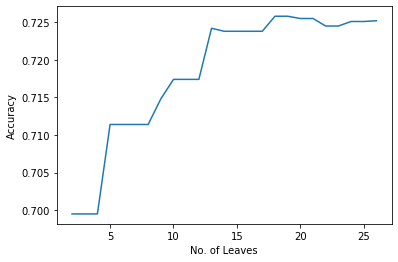

In [17]:
def dt_model_pruning(x_train,y_train,x_test,y_test,method,max_leaf_nodes):
    
    '''This function will prune the decision tree model using different parameters
    and will also plot the accuracy/misclassification rate for each number of leaves'''
    
    print("Decision Tree Model using: ", method.upper())
    
    Accuracy = [] # Model accuracy using different complexities
    Leaves = []   # No. of leaves/splits/leaf_nodes 
    
    # Fit a Model with different complexity
    for i in list(range(2,max_leaf_nodes+2)):
        
        # Training the Model with given complexity
        dt = DecisionTreeClassifier(criterion = method, max_leaf_nodes = i, max_depth = 5)
        fit = dt.fit(x_train,y_train)

        # Prediction based on test data 
        y_pred = dt.predict(X_test)
        y_pred = pd.DataFrame(y_pred,columns = ["y_hat"])   

        # Accuracy of Model with with given complexity
        accuracy = metrics.accuracy_score(y_test,y_pred.y_hat).round(4) 
        Accuracy.append(accuracy)
        Leaves.append(i)
        
    # Plot Accuracy of model against complexity
    model_output = pd.DataFrame({"Accuracy":Accuracy, "No. of Leaves":Leaves})
    sns.lineplot(x = "No. of Leaves", y = "Accuracy", data = model_output)
        
    return model_output

import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
dt_model_pruning(x_train = X, y_train = Y, x_test = X_test, y_test = Y_test,
                 method = "entropy", max_leaf_nodes = 25)

In [ ]:
2 ** depth 